<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/transfer/cifar10_resnet_without_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. RESNET 모델로 CIFAR10 데이터셋 인식

전이학습에 필요한 파이썬 라이브러리 임포트 하기

In [10]:
from tensorflow.keras import datasets

##1-1. 전이학습에 사용할 CIFAR10 데이터셋을 다운로드  

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

CIFAR10 데이터셋 라벨을 정한다.

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

다운받은 CIFAR10 데이터를 몇가지 둘러본다.

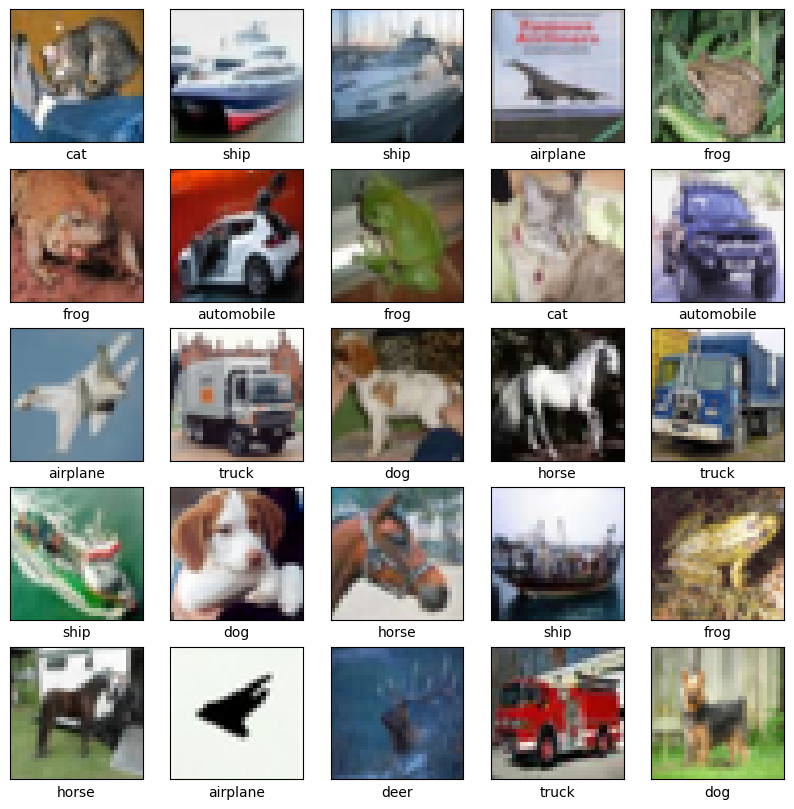

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

##1-2. RESNET 모델 생성

pre-trained 신경망 모델을 가져와서 CIFAR10 데이터를 넣어 분류테스트

** ResNet(1000개 class 분류기) 활용**

- include_top = True로 설정해 분류기를 그대로 가져온다.    
- weights = 'imagenet'->  imagenet의 사전학습된 weights 사용   
- input_shape : ResNet 모델 사용을 위해 ResNet의 Input 사이즈인 224x224와 3개 채널로 설정


In [14]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=True, input_shape = (224, 224 ,3), weights = 'imagenet')


pre-trained 모델의 구조를 살펴 본다

In [ ]:
base_model.summary()

##1-3. 모델 구성

모델을 컴파일한다.

In [16]:
base_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

10개의 테스트 이미지를 모델에 feed-forward해서 모델의 성능을 판단해 본다.

In [17]:
import tensorflow as tf

for i in range(10):
  # Test_images(cifar10의 테스트데이터)의 i번째 이미지에 대한 평가
  inputs = test_images[i]

  # ResNet이 원하는 이미지 차원은 (None, 224, 224, 3)이므로 차원 하나를 더 추가해준다.
  #[높이, 너비, 채널] -> [1, 높이, 너비, 채널]
  inputs = tf.expand_dims(inputs, axis=0)

  # ResNet의 인풋사이즈에 맞춰준다.
  # 안맞춰도 돌아가지만 성능을 위해 > 바로 이 전처리 모듈이 있어서 알아서 맞춰주긴함
  x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs)
  x = tf.keras.applications.resnet50.preprocess_input(x)

   # 모델의 성능을 파악해본다.
  histoy = base_model.evaluate(x, test_labels[i])


1/1 [==============================] - 0s 36ms/step - loss: 13.3401 - accuracy: 0.0000e+00


##1-4. 이미지 분류

이미지 분류를 실행해 본다.

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import decode_predictions


1/1 [==============================] - 0s 21ms/step


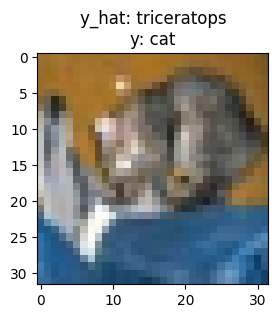

1/1 [==============================] - 0s 22ms/step


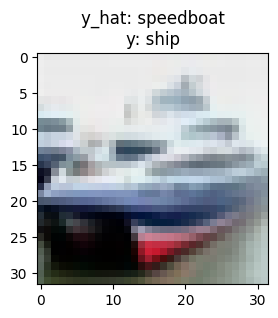

1/1 [==============================] - 0s 21ms/step


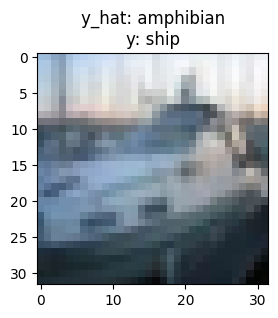

1/1 [==============================] - 0s 24ms/step


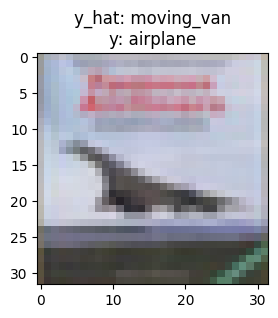

1/1 [==============================] - 0s 28ms/step


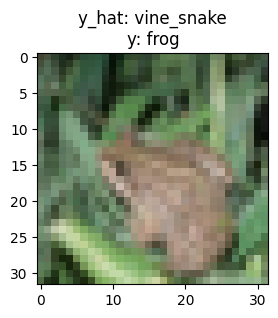

In [24]:
# 5개 이미지 예측

for i in range(5):

  inputs = test_images[i]
  inputs = tf.expand_dims(inputs, axis=0)

  x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs)
  x = tf.keras.applications.resnet50.preprocess_input(x)

  # ResNet Model의 예측진행
  preds = base_model.predict(x)

  # 예측 명 1순위를 넣는다.
  predicted_label = decode_predictions(preds, top=1)[0][0][1]

  # 실제 이름을 리스트에서 가져옵니다.
  actual_label = class_names[test_labels[i,0]]

  # 이미지 출력
  fig= plt.figure(figsize=(3,3))

  # 예측된 레이블과 실제 레이블을 타이틀에 추가합니다.
  plt.title(f"y_hat: {predicted_label}\ny: {actual_label}")
  plt.imshow(test_images[i])
  plt.show();

